In [1]:
# Instalamos la lib
!git clone https://github.com/elsonidoq/ml-practico-2022.git 

Cloning into 'ml-practico-2022'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (251/251), done.
remote: Compressing objects: 100% (176/176), done.
remote: Total 251 (delta 146), reused 173 (delta 72), pack-reused 0
Receiving objects: 100% (251/251), 3.04 MiB | 26.19 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [4]:
import sys
sys.path.append('ml-practico-2022/lib')

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
from taller_model_selection.serialize import iter_jl

X_train = list(iter_jl('/content/gdrive/MyDrive/taller-model-selection-data/X_train.jl'))
y_train = list(iter_jl('/content/gdrive/MyDrive/taller-model-selection-data/y_train.jl'))

In [58]:
import pandas as pd

df = pd.DataFrame(X_train)
df['price'] = y_train

# Inspeccionamos algunos ejemplos

In [60]:
df.iloc[10]

id                                          U3qdJMKXnOJm0Y1tWpnnfg==
ad_type                                                    Propiedad
start_date                                                2020-08-22
end_date                                                  2020-09-04
created_on                                                2020-08-22
lat                                                       -34.597364
lon                                                       -58.372987
l1                                                         Argentina
l2                                                   Capital Federal
l3                                                            Retiro
l4                                                               NaN
l5                                                               NaN
l6                                                               NaN
rooms                                                            NaN
bedrooms                          

In [8]:
df.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'currency', 'price_period', 'title',
       'description', 'property_type', 'operation_type', 'price'],
      dtype='object')

In [9]:
df.describe()

,lat,lon,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,150908.000000,150908.000000,0.0,0.0,138320.000000,117573.000000,139546.000000,107421.000000,105888.000000,1.612190e+05
mean,-34.591701,-58.458926,NaN,NaN,2.693660,1.961267,1.585685,162.579188,143.615131,2.820959e+05
std,0.339597,0.494422,NaN,NaN,1.511625,1.883031,0.957838,1279.863321,3241.291645,4.652050e+05
min,-53.788624,-100.469651,NaN,NaN,1.000000,-2.000000,1.000000,10.000000,1.000000,1.000100e+04
25%,-34.615582,-58.464272,NaN,NaN,2.000000,1.000000,1.000000,45.000000,41.000000,1.000000e+05
50%,-34.596833,-58.439298,NaN,NaN,3.000000,2.000000,1.000000,70.000000,60.000000,1.600000e+05
75%,-34.577063,-58.408229,NaN,NaN,3.000000,3.000000,2.000000,125.000000,102.000000,2.850000e+05
max,26.217375,-5.490771,NaN,NaN,40.000000,153.000000,20.000000,140380.000000,950000.000000,9.999999e+06


# Scatter map

## Grafico de barrios
Estan todos representados

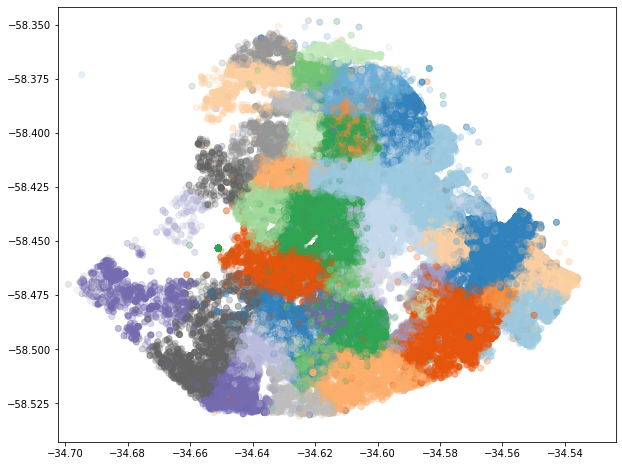

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import count
from collections import defaultdict

c = count()
l3_to_int = defaultdict(lambda : next(c))
l3_int = [l3_to_int[x] for x in df.l3]

plt.figure(figsize=(10,8))
plt.scatter(df.lat, df.lon, c=l3_int, alpha=0.25, cmap='tab20c')
margin = 0.02
plt.xlim(np.percentile(df.lat.dropna(), 1) - 2 * margin, np.percentile(df.lat.dropna(), 99) + margin)
plt.ylim(np.percentile(df.lon.dropna(), 1) - margin, np.percentile(df.lon.dropna(), 99) + margin);

## Precio por metro cuadrado

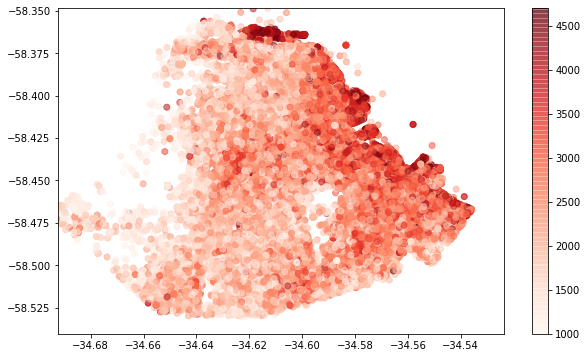

In [67]:
def normal_mask(s):
  return (s>=np.percentile(s, 5)) & (s <=np.percentile(s, 95))

plt.figure(figsize=(10,6))

sdf = df.dropna(subset=['lat', 'lon', 'price', 'surface_total'])
sdf = sdf[normal_mask(sdf.price / sdf.surface_total)]
          
plt.scatter(sdf.lat, sdf.lon, c=sdf.price / sdf.surface_total, alpha=0.5,  cmap='Reds')
margin = 0.02
plt.xlim(np.percentile(sdf.lat.dropna(), 1) - 2 * margin, np.percentile(sdf.lat.dropna(), 99) + margin)
plt.ylim(np.percentile(sdf.lon.dropna(), 1) - margin, np.percentile(sdf.lon.dropna(), 99) + margin)
plt.colorbar();

# Algunas distribuciones

In [58]:
# Solo hay ventas
df.operation_type.value_counts()

Venta    161219
Name: operation_type, dtype: int64

In [59]:
df.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'currency', 'price_period', 'title',
       'description', 'property_type', 'operation_type', 'price'],
      dtype='object')

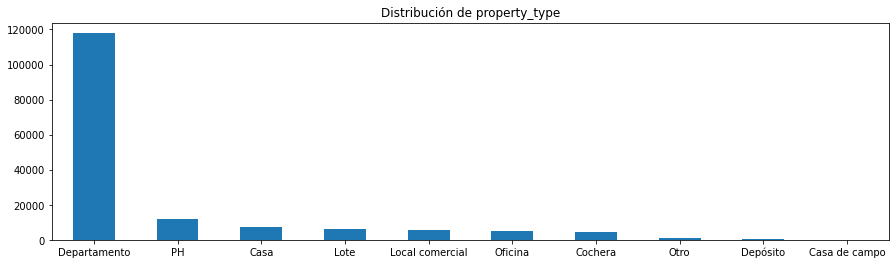

In [81]:
# Que tipo de propiedades

plt.figure(figsize=(15,4))
plt.title('Distribución de property_type')
df.property_type.value_counts().plot.bar()
plt.xticks(rotation=0);

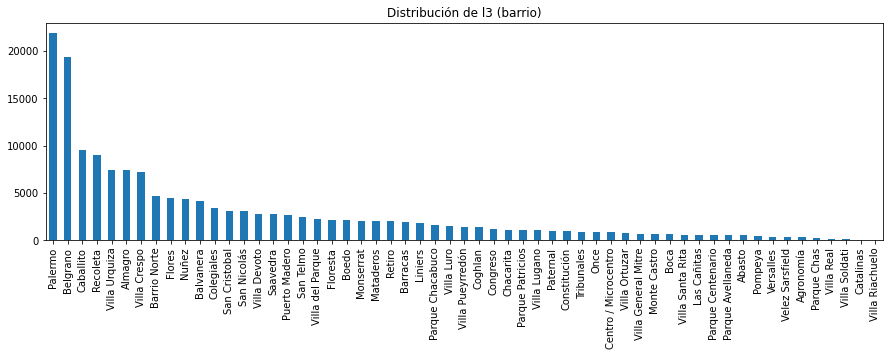

In [80]:
# Que barrios

plt.figure(figsize=(15,4))
plt.title('Distribución de l3 (barrio)')
df.l3.value_counts().plot.bar();

# Precio vs superficie

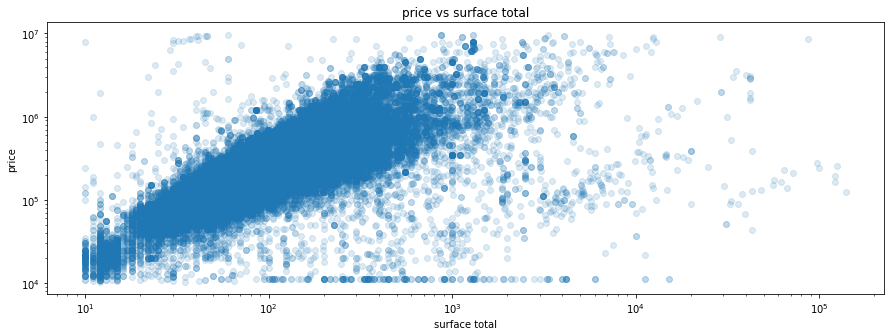

In [83]:
plt.figure(figsize=(15,5))
plt.scatter(sdf.surface_total, sdf.price, alpha=0.15)
plt.title('price vs surface total')
plt.xlabel('surface total')
plt.ylabel('price')
plt.xscale('log')
plt.yscale('log')